### 1. Analyze the data

#### Import Libraries

In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Data Preprocessing

In [2]:
df = pd.read_csv('Downloads/MSFT_forSVM.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12,04/25/2022,273.290009,281.109985,270.769989,280.720001,280.720001,35678900
13,04/26/2022,277.500000,278.359985,270.000000,270.220001,270.220001,46518400
14,04/27/2022,282.100006,290.970001,279.160004,283.220001,283.220001,63477700
15,04/28/2022,285.190002,290.980011,281.459991,289.630005,289.630005,33646600
16,04/29/2022,288.609985,289.880005,276.500000,277.519989,277.519989,37025000


#### Train set

In [3]:
#Create a new dataframe for train set
dftrain = df.head(len(df)-6)
dftrain

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/06/2022,305.190002,307.000000,296.709991,299.500000,299.500000,40110400
1,04/07/2022,296.660004,303.649994,296.350006,301.369995,301.369995,31411200
2,04/08/2022,300.440002,301.119995,296.279999,296.970001,296.970001,24361900
3,04/11/2022,291.790009,292.609985,285.000000,285.260010,285.260010,34569300
4,04/12/2022,289.239990,290.739990,280.489990,282.059998,282.059998,30966700
5,04/13/2022,282.730011,288.579987,281.299988,287.619995,287.619995,21907200
6,04/14/2022,288.089996,288.309998,279.320007,279.829987,279.829987,28221600
7,04/18/2022,278.910004,282.459991,278.339996,280.519989,280.519989,20778000
8,04/19/2022,279.380005,286.170013,278.410004,285.299988,285.299988,22297700
9,04/20/2022,289.399994,289.700012,285.369995,286.359985,286.359985,22906700


In [4]:
#Create empty lists to store the independent and dependent data
days = list()
adj_close_prices = list()

In [5]:
#Get the dates and lists to store independent and dependent data
dftrain_days = dftrain.loc[:, 'Date']
dftrain_adj_price = dftrain.loc[:, 'Adj Close']

In [6]:
#Create the independent data set
for day in dftrain_days:
    days.append( [int(day.split('/')[1])])
    
#Create the dependent data set
for adj_close_price in dftrain_adj_price:
    adj_close_prices.append(float(adj_close_price))

In [7]:
days

[[6], [7], [8], [11], [12], [13], [14], [18], [19], [20], [21]]

In [8]:
adj_close_prices

[299.5,
 301.369995,
 296.970001,
 285.26001,
 282.059998,
 287.619995,
 279.829987,
 280.519989,
 285.299988,
 286.359985,
 280.809998]

#### Test set

In [9]:
#Get test data
dftest = df.tail(6)
dftest

,Date,Open,High,Low,Close,Adj Close,Volume
11,04/22/2022,281.679993,283.200012,273.380005,274.029999,274.029999,29405800
12,04/25/2022,273.290009,281.109985,270.769989,280.720001,280.720001,35678900
13,04/26/2022,277.500000,278.359985,270.000000,270.220001,270.220001,46518400
14,04/27/2022,282.100006,290.970001,279.160004,283.220001,283.220001,63477700
15,04/28/2022,285.190002,290.980011,281.459991,289.630005,289.630005,33646600
16,04/29/2022,288.609985,289.880005,276.500000,277.519989,277.519989,37025000


In [10]:
#Create empty lists to store the independent and dependent data
test_days = list()
test_close_prices = list()

In [11]:
#Get the dates and lists to store independent and dependent data
dftest_days = dftest.loc[:, 'Date']
dftest_adj_price = dftest.loc[:, 'Adj Close']

In [12]:
#Create the independent data set
for test_day in dftest_days:
    test_days.append( [int(test_day.split('/')[1])])
    
#Create the dependent data set
for test_close_price in dftest_adj_price:
    test_close_prices.append(float(test_close_price))

In [13]:
dftest_days

11     04/22/2022
12     04/25/2022
13     04/26/2022
14     04/27/2022
15     04/28/2022
16     04/29/2022
Name: Date, dtype: object

In [14]:
dftest_adj_price

11    274.029999
12    280.720001
13    270.220001
14    283.220001
15    289.630005
16    277.519989
Name: Adj Close, dtype: float64

### 2. Train the model

In [15]:
#Create Support Vector Regression Models
#Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

### 3. Test the model

In [16]:
pr_rbf = rbf_svr.predict(test_days)

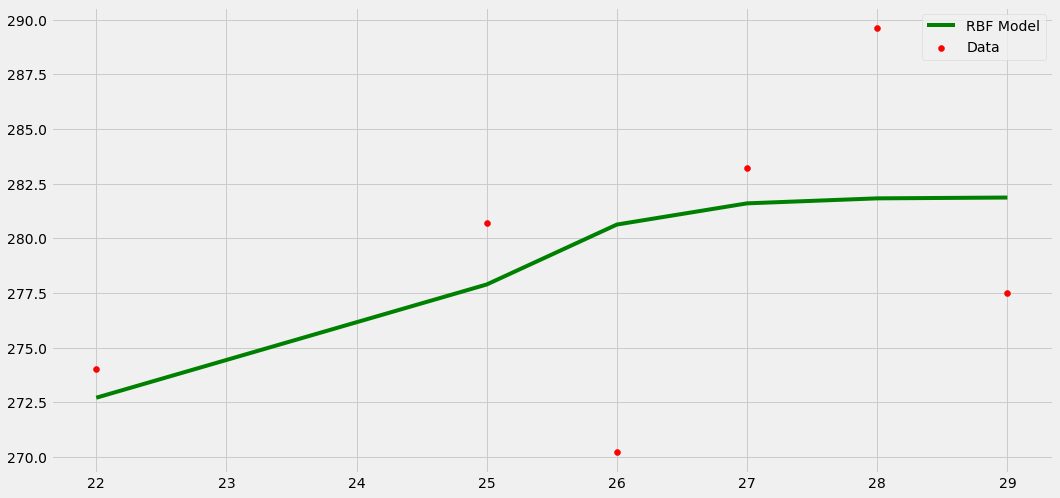

In [17]:
#plot the models ona graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(test_days, test_close_prices, color='red', label='Data')
plt.plot(test_days, pr_rbf, color='green', label='RBF Model')
plt.legend()
plt.show()

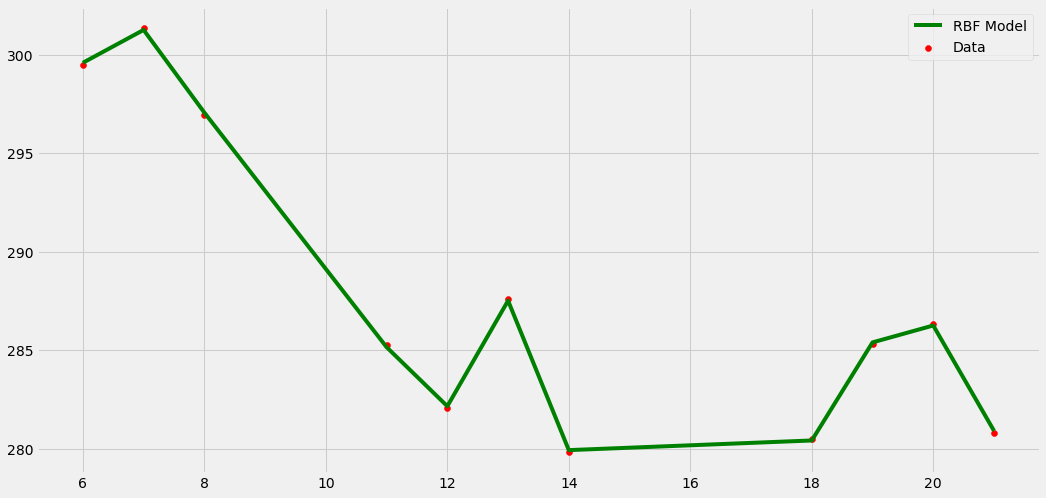

In [18]:
#plot the models ona graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='red', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.legend()
plt.show()

### 4. Prediction accuracy

In [28]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [29]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(adj_close_prices, rbf_svr.predict(days))}\t{r2_score(test_close_prices, rbf_svr.predict(test_days))}
{'MSE'.ljust(10)}{mse(adj_close_prices, rbf_svr.predict(days))}\t{mse(test_close_prices, rbf_svr.predict(test_days))}
'''

In [30]:
print(scores)


Metric           Train                Test        
r2_score  0.9998216491846591	0.15544906229264088
MSE       0.010024209470213928	33.422297973493876

